In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [67]:
data = pd.read_csv("data/combined_stats.csv", index_col=0)
# Missing column is awards_per (useless)
data = data.rename(columns={'USG%':'USG'})
print(data.columns[0:100])

relevant_players = data[(data['MP_g'] > 15) & (data['G'] > 20)]

Index(['Rk_g', 'Player', 'Age_g', 'Team_g', 'Pos_g', 'G_g', 'GS_g', 'MP_g',
       'FG_g', 'FGA_g', 'FG%_g', '3P_g', '3PA_g', '3P%_g', '2P_g', '2PA_g',
       '2P%_g', 'eFG%_g', 'FT_g', 'FTA_g', 'FT%_g', 'ORB_g', 'DRB_g', 'TRB_g',
       'AST_g', 'STL_g', 'BLK_g', 'TOV_g', 'PF_g', 'PTS_g', 'Awards_g',
       'PTS_tot', 'AST_tot', 'TRB_tot', 'STL_tot', 'BLK_tot', 'FT_tot',
       'FTA_tot', 'FG_tot', 'FGA_tot', '3P_tot', 'TOV_tot', 'Fpoints_tot',
       'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', ' Rk', 'Pos_per',
       'Tm', 'G_per', 'MP_per', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Player-additional', 'Rk_per',
       'Team_per', 'Pos', 'G', 'GS_per', 'MP', 'FG_per', 'FGA_per', 'FG%_per',
       '3P_per', '3PA_per', '3P%_per', '2P_per', '2PA_per', '2P%_per',
       'eFG%_per', 'FT_per', 'FTA_per', 'FT%_per', 'ORB_per', 'DRB_per',
       'TRB_per', 'A

In [68]:
# Looking at fantasy relevant players
large_role = data[(data['MP_g'] > 25) & (data['G'] > 35)]
fantasy_related=['Player', 'MP_g', 'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', 'AST_g','TRB_g', 'STL_g', 'BLK_g', 
                 'FGA_g', 'FG%_g', '3PA_g', '3P%_g', 'FTA_g', 'FT%_g', 'PTS_g']
base_fantasy = large_role[fantasy_related]
print(base_fantasy.shape)

(172, 16)


In [69]:

base_fantasy.sort_values(by = 'Fpoints_avg_min', ascending = False).head(50).reset_index(drop=True, inplace=True)
base_fantasy['Fpoints_permin_rank'] = base_fantasy['Fpoints_avg_min'].rank(ascending=False)
base_fantasy['Fpoints_pergame_rank'] = base_fantasy['Fpoints_avg_G'].rank(ascending=False)
base_fantasy['permin_pergame_rank_diff'] = base_fantasy['Fpoints_permin_rank'] - base_fantasy['Fpoints_pergame_rank']
base_fantasy.sort_values(by='permin_pergame_rank_diff', ascending=False).head(30)

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/2712689636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_fantasy['Fpoints_permin_rank'] = base_fantasy['Fpoints_avg_min'].rank(ascending=False)
/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/2712689636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_fantasy['Fpoints_pergame_rank'] = base_fantasy['Fpoints_avg_G'].rank(ascending=False)
/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/27126896

,Player,MP_g,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36,AST_g,TRB_g,STL_g,BLK_g,FGA_g,FG%_g,3PA_g,3P%_g,FTA_g,FT%_g,PTS_g,Fpoints_permin_rank,Fpoints_pergame_rank,permin_pergame_rank_diff
83,Coby White,36.5,33.6,0.920548,33.139726,5.1,4.5,0.7,0.2,15.3,0.447,7.0,0.376,3.3,0.838,19.1,118.0,69.0,49.0
49,Miles Bridges,37.4,36.9,0.986631,35.518717,3.3,7.3,0.9,0.5,17.5,0.462,6.5,0.349,3.1,0.825,21.0,98.0,55.0,43.0
77,Mikal Bridges,34.8,32.8,0.942529,33.931034,3.6,4.5,1.0,0.4,15.8,0.436,7.2,0.372,3.9,0.814,19.6,113.0,72.0,41.0
20,DeMar DeRozan,37.8,41.3,1.092593,39.333333,5.3,4.3,1.1,0.6,17.2,0.480,2.8,0.333,7.7,0.853,24.0,71.0,30.0,41.0
50,Jerami Grant,33.9,31.0,0.914454,32.920354,2.8,3.5,0.8,0.6,15.7,0.451,5.1,0.402,5.8,0.817,21.0,119.0,85.0,34.0
138,OG Anunoby,34.0,29.5,0.867647,31.235294,2.1,4.2,1.4,0.7,11.5,0.489,5.3,0.382,1.8,0.753,14.7,133.0,99.5,33.5
345,Josh Hart,33.4,27.2,0.814371,29.317365,4.1,8.3,0.9,0.3,8.4,0.434,3.2,0.310,1.4,0.791,9.4,149.0,117.0,32.0
21,Julius Randle,35.4,38.6,1.090395,39.254237,5.0,9.2,0.5,0.3,18.2,0.472,5.3,0.311,6.6,0.781,24.0,72.0,41.0,31.0
31,Anfernee Simons,34.4,34.6,1.005814,36.209302,5.5,3.6,0.5,0.1,18.2,0.430,8.8,0.385,3.9,0.916,22.6,95.0,65.0,30.0
133,Keegan Murray,33.6,30.7,0.913690,32.892857,1.7,5.5,1.0,0.8,12.7,0.454,6.6,0.358,1.6,0.831,15.2,120.0,90.0,30.0


In [70]:
# Including some sleepers & lower role players
adv_cols = ['Player', 'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', 'STL%', 'BLK%', 'USG', '3PAr', 'FTr', 'TRB%', 
               'OWS', 'DWS', 'WS/48', 'BPM', 'VORP']

adv_data = relevant_players[adv_cols]

adv_data.sort_values(by = 'Fpoints_avg_min', ascending = False).head(50).reset_index(drop=True, inplace=True)
adv_data['Fpoints_permin_rank'] = adv_data['Fpoints_avg_min'].rank(ascending=False)
adv_data['Fpoints_pergame_rank'] = adv_data['Fpoints_avg_G'].rank(ascending=False)
adv_data['permin_pergame_rank_diff'] = adv_data['Fpoints_permin_rank'] - adv_data['Fpoints_pergame_rank']
adv_data.sort_values(by='permin_pergame_rank_diff', ascending=False).head(30)


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/612697526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adv_data['Fpoints_permin_rank'] = adv_data['Fpoints_avg_min'].rank(ascending=False)
/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/612697526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adv_data['Fpoints_pergame_rank'] = adv_data['Fpoints_avg_G'].rank(ascending=False)
/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/612697526.py:10: SettingWi

,Player,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36,STL%,BLK%,USG,3PAr,FTr,TRB%,OWS,DWS,WS/48,BPM,VORP,Fpoints_permin_rank,Fpoints_pergame_rank,permin_pergame_rank_diff
168,Saddiq Bey,24.8,0.758410,27.302752,1.2,0.5,17.0,0.514,0.291,10.9,2.8,0.7,0.081,-1.8,0.1,267.0,147.0,120.0
313,Kentavious Caldwell-Pope,23.8,0.753165,27.113924,2.0,1.5,12.9,0.525,0.193,4.2,2.2,2.6,0.096,-1.4,0.4,271.0,153.0,118.0
115,Shaedon Sharpe,26.0,0.785498,28.277946,1.3,1.0,22.4,0.415,0.274,8.5,-0.2,0.6,0.022,-2.8,-0.2,252.0,135.0,117.0
345,Josh Hart,27.2,0.814371,29.317365,1.4,0.8,13.5,0.380,0.169,14.0,2.0,3.6,0.100,0.0,1.4,240.0,124.0,116.0
249,Isaiah Stewart,23.5,0.760518,27.378641,0.6,2.3,14.5,0.458,0.223,11.9,0.9,0.8,0.056,-2.3,-0.1,266.0,157.0,109.0
189,Dillon Brooks,21.1,0.682848,24.582524,1.4,0.4,17.6,0.482,0.191,5.9,0.6,2.1,0.058,-3.6,-0.9,295.0,190.0,105.0
138,OG Anunoby,29.5,0.867647,31.235294,2.0,1.9,17.6,0.463,0.154,6.8,1.1,1.5,0.073,-0.6,0.6,208.0,103.5,104.5
83,Coby White,33.6,0.920548,33.139726,0.9,0.6,22.7,0.460,0.215,6.9,3.1,1.6,0.078,-0.7,0.9,174.0,71.0,103.0
172,Grayson Allen,29.1,0.868657,31.271642,1.3,1.6,14.5,0.652,0.216,6.6,4.7,2.2,0.132,1.3,2.0,205.0,107.0,98.0
200,Max Strus,27.3,0.853125,30.712500,1.4,1.2,17.4,0.658,0.133,8.5,1.2,2.6,0.083,-0.6,0.8,218.0,122.0,96.0


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_19783/2333302274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(adv_data.corr(), annot=True, vmin = -1, vmax = 1)


<Figure size 3000x3000 with 0 Axes>

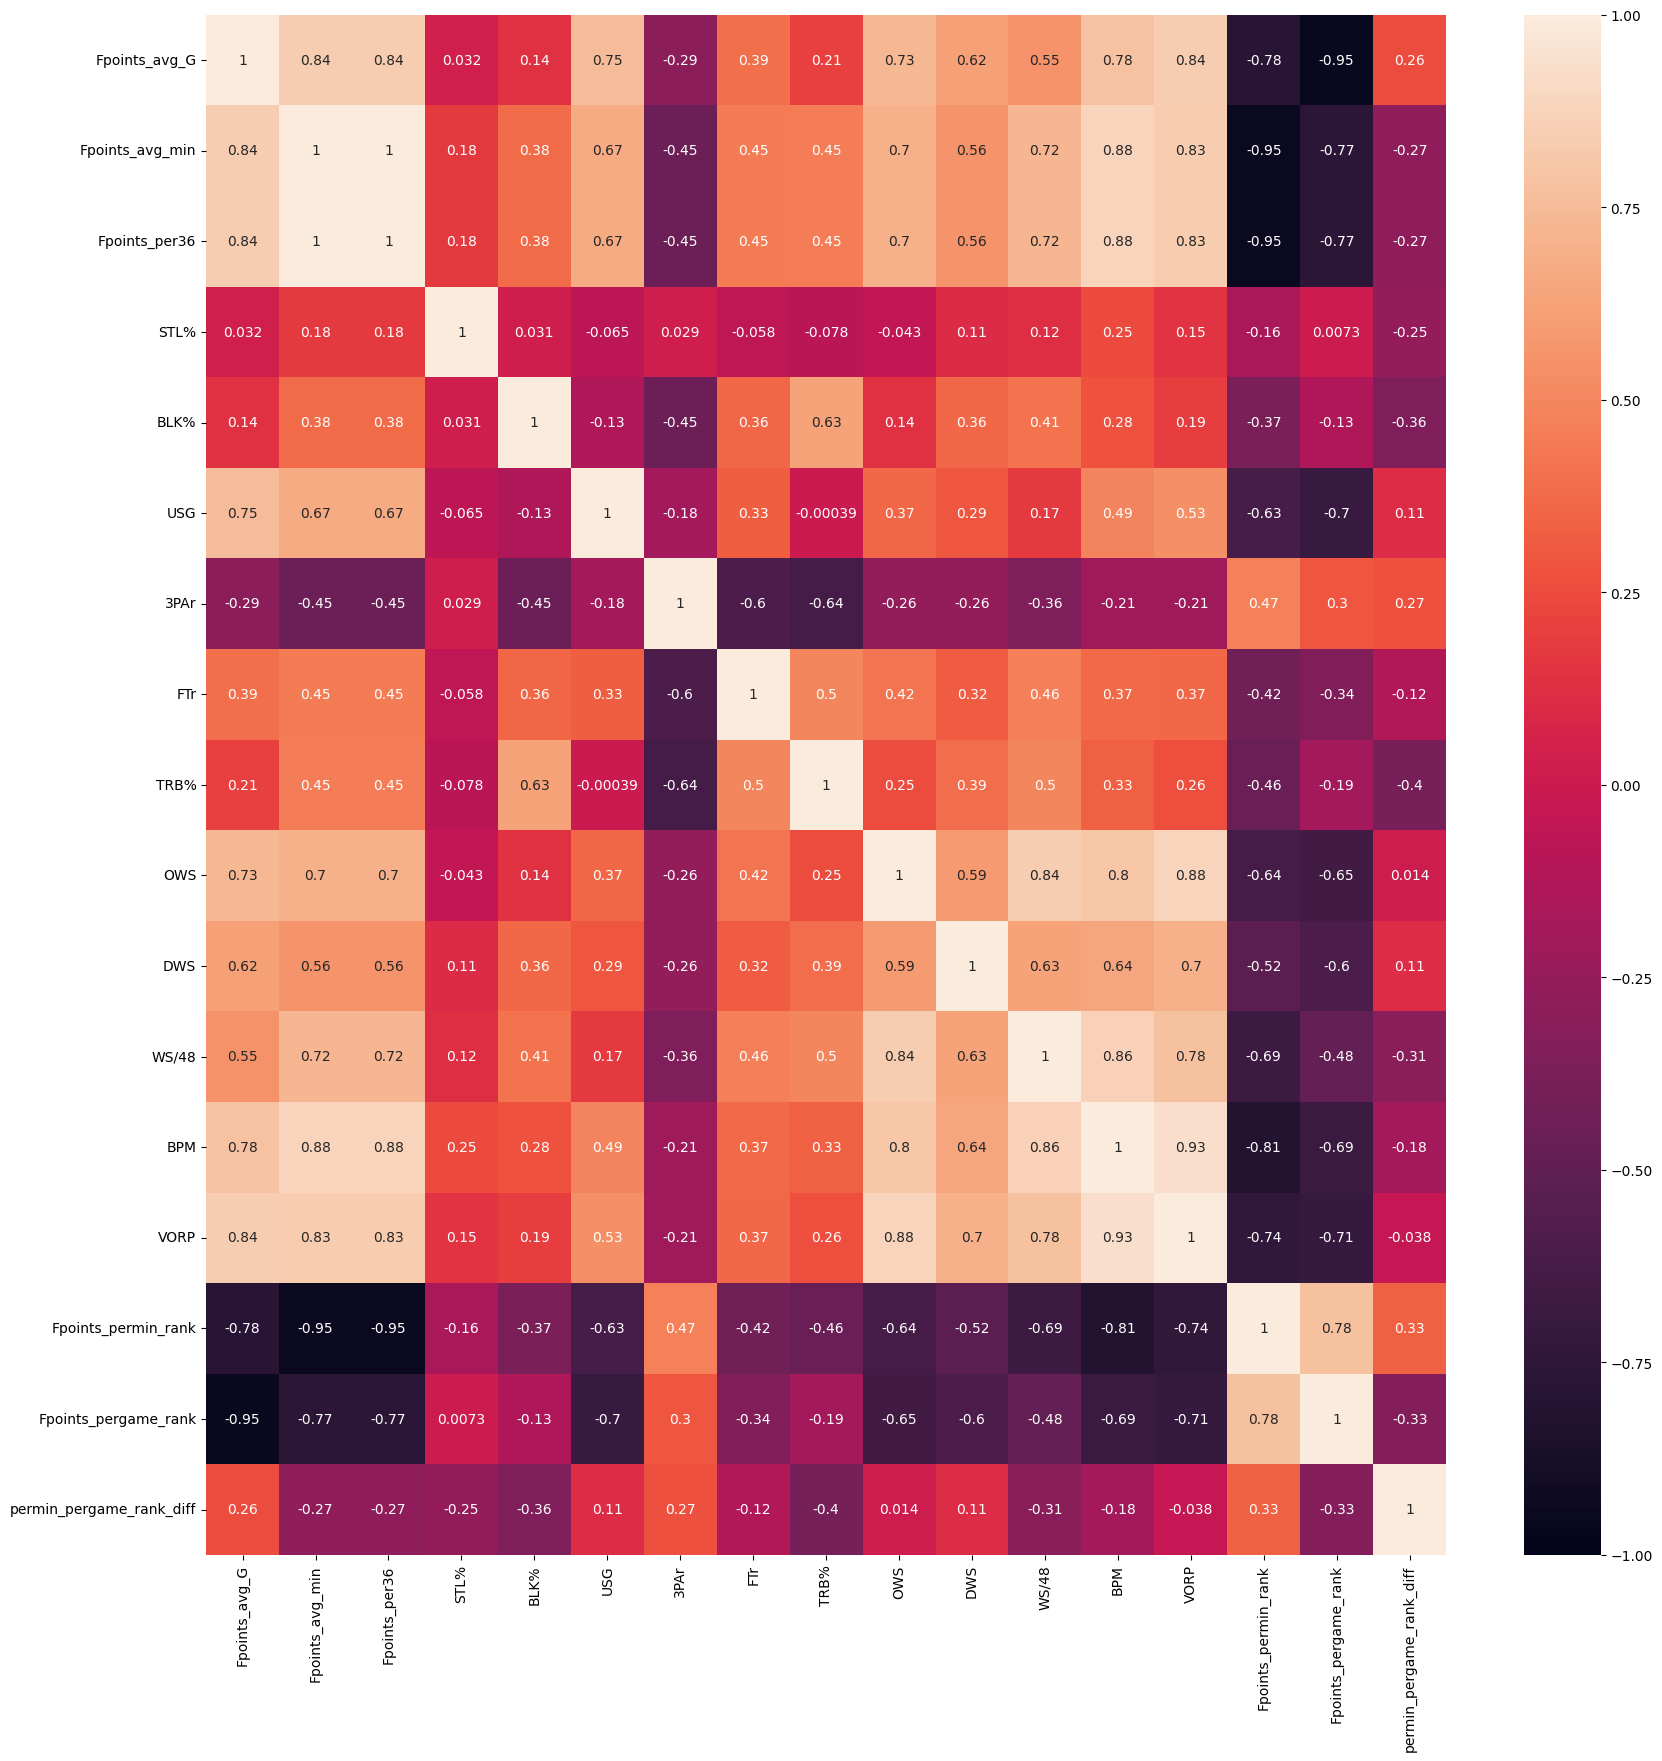

<Figure size 3000x3000 with 0 Axes>

In [71]:
plt.figure(figsize=(20,20))
sn.heatmap(adv_data.corr(), annot=True, vmin = -1, vmax = 1)
plt.figure(figsize=(30,30))

In [72]:
# usage analysis:
adv_data[adv_data['Fpoints_pergame_rank'] < 175].sort_values(by = 'USG', ascending = False).head(60)

,Player,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36,STL%,BLK%,USG,3PAr,FTr,TRB%,OWS,DWS,WS/48,BPM,VORP,Fpoints_permin_rank,Fpoints_pergame_rank,permin_pergame_rank_diff
0,Joel Embiid,62.1,1.848214,66.535714,1.7,4.6,39.6,0.163,0.531,18.1,5.2,2.3,0.275,11.6,4.5,1.0,3.0,-2.0
1,Luka Dončić,63.9,1.704000,61.344000,1.8,1.3,36.0,0.450,0.368,13.5,8.5,3.5,0.220,9.9,8.0,4.0,1.0,3.0
22,LaMelo Ball,45.4,1.405573,50.600619,2.8,0.5,34.3,0.466,0.246,8.9,0.6,0.5,0.074,3.3,1.0,12.0,21.0,-9.0
2,Giannis Antetokounmpo,58.3,1.656250,59.625000,1.6,2.6,33.0,0.091,0.571,17.9,9.5,3.7,0.246,9.0,7.2,6.0,4.0,2.0
3,Shai Gilgeous-Alexander,56.8,1.670588,60.141176,2.8,2.4,32.8,0.181,0.436,9.1,10.5,4.2,0.275,9.0,7.1,5.0,5.0,0.0
4,Jalen Brunson,46.2,1.305085,46.983051,1.3,0.4,32.5,0.319,0.302,5.7,8.8,2.4,0.198,5.8,5.4,23.0,18.0,5.0
12,Anthony Edwards,42.4,1.207977,43.487179,1.8,1.3,32.3,0.341,0.325,8.8,2.9,4.7,0.130,3.3,3.7,42.0,26.5,15.5
46,Victor Wembanyama,51.2,1.723906,62.060606,2.0,10.0,32.2,0.332,0.309,19.4,-0.7,4.4,0.085,5.2,3.8,3.0,8.0,-5.0
9,Donovan Mitchell,48.4,1.371105,49.359773,2.6,1.4,31.4,0.454,0.292,8.1,3.6,2.9,0.159,5.8,3.9,14.0,11.0,3.0
10,Stephen Curry,42.4,1.296636,46.678899,1.1,1.0,31.3,0.606,0.224,7.4,5.2,2.0,0.142,5.2,4.4,26.0,26.5,-0.5


In [76]:


# Ensure the output is displayed in the notebook (if you're using one)
output_notebook()

def plot_scatter_tooltip(data, x, y):
    source = ColumnDataSource(data)
    p = figure(title="Scatter Plot of " + x + " vs " + y,
               x_axis_label=x,
               y_axis_label=y,
               tools="pan,wheel_zoom,box_zoom,reset")
    p.scatter(x=x, y=y, size=10, source=source)
    hover = HoverTool()
    hover.tooltips = [("Player", "@Player"), (x, "@" + x), (y, "@" + y + '%')]
    p.add_tools(hover)
    show(p)
    
plot_scatter_tooltip(adv_data, 'Fpoints_avg_min', 'USG')


Loading BokehJS ...

In [32]:
# Looking at ELITE VORP producers (90% quantile)
elite_vorp = adv_data[adv_data['VORP'] > adv_data['VORP'].quantile(0.9)]
# elite_vorp_ws = elite_vorp[elite_vorp['WS/48'] > adv_data['WS/48'].quantile(0.9)]
elite_vorp_ws_bpm = elite_vorp[elite_vorp['BPM'] > adv_data['BPM'].quantile(0.9)]
elite_vorp_ws_bpm.sort_values(by = 'Fpoints_avg_min', ascending = False)

,Player,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36,STL%,BLK%,USG%,3PAr,FTr,TRB%,OWS,DWS,WS/48,BPM,VORP,Fpoints_permin_rank
0,Joel Embiid,62.1,1.848214,66.535714,1.7,4.6,39.6,0.163,0.531,18.1,5.2,2.3,0.275,11.6,4.5,1.0
11,Nikola Jokić,63.0,1.820809,65.549133,2.0,2.1,29.3,0.164,0.310,19.8,12.0,5.1,0.299,13.2,10.6,2.0
46,Victor Wembanyama,51.2,1.723906,62.060606,2.0,10.0,32.2,0.332,0.309,19.4,-0.7,4.4,0.085,5.2,3.8,3.0
1,Luka Dončić,63.9,1.704000,61.344000,1.8,1.3,36.0,0.450,0.368,13.5,8.5,3.5,0.220,9.9,8.0,4.0
3,Shai Gilgeous-Alexander,56.8,1.670588,60.141176,2.8,2.4,32.8,0.181,0.436,9.1,10.5,4.2,0.275,9.0,7.1,5.0
2,Giannis Antetokounmpo,58.3,1.656250,59.625000,1.6,2.6,33.0,0.091,0.571,17.9,9.5,3.7,0.246,9.0,7.2,6.0
63,Tyrese Haliburton,50.3,1.562112,56.236025,1.8,1.7,24.6,0.510,0.217,6.9,7.6,1.5,0.195,6.9,5.0,7.0
18,Anthony Davis,55.1,1.552113,55.876056,1.6,5.7,26.7,0.083,0.402,19.8,7.2,4.7,0.210,5.1,4.9,8.0
14,LeBron James,51.8,1.467422,52.827195,1.7,1.3,29.2,0.286,0.318,11.5,5.7,2.8,0.164,6.5,5.4,9.0
81,Domantas Sabonis,50.2,1.406162,50.621849,1.2,1.5,22.2,0.081,0.389,21.4,8.6,4.0,0.206,6.5,6.2,11.0


<AxesSubplot: xlabel='Age_g', ylabel='PTS_g'>

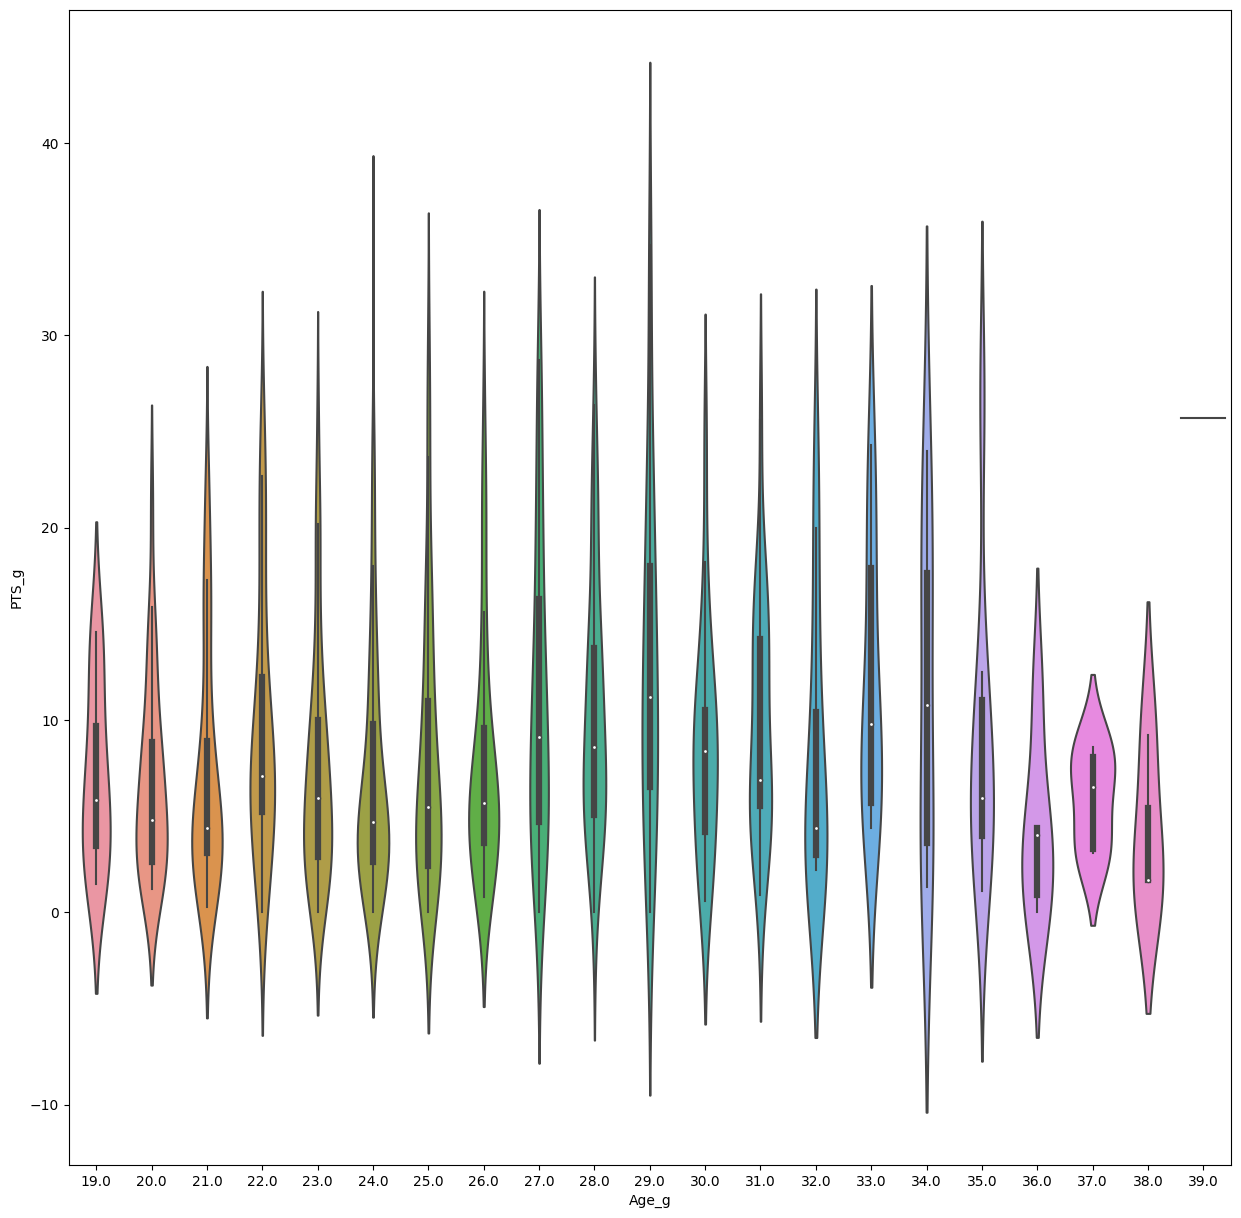

In [28]:
plt.figure(figsize=(15,15))
sn.violinplot(data=data, x='Age_g', y='PTS_g')